# **Clustering and PCA with a Spotify Songs dataset**

Variables information: [Spotify Audio Features](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features) 

### Libreries Import

In [1]:
# Author: Santiago Arevalo Valencia

# Data manipulation
import pandas as pd
import numpy as np

# Visualisation
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Plotting
import matplotlib.pyplot as plt

# Dimensionality reduction
from sklearn.decomposition import PCA

# Hierarchical clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.datasets import load_iris

### Loading Data

In [2]:
dataset = pd.read_csv('data.csv')
dataset.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


### EDA (Dropping, duplicated values, null values)

In [3]:
# Drop unnamed column
# dataset.drop(dataset.columns[0], axis=1, inplace=True)

# Review duplicates and drop them
dataset.duplicated().sum()
dataset.drop_duplicates(inplace=True)

# Review missing values
dataset.isnull().sum()

dataset

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


## **Clustering**

#### *Dropping columns unnecessary for clustering*

In [4]:
# Apply Clustering to the dataset to find similarities between songs

# Make a copy of song_title column before dropping it
song_titles = dataset['name']
# Drop columns that are not needed for clustering
dataset.drop(['release_date', "artists", "name", "id"], axis=1, inplace=True)
dataset.head()


,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
0,0.0594,1921,0.982,0.279,831667,0.211,0,0.878000,10,0.665,-20.096,1,4,0.0366,80.954
1,0.9630,1921,0.732,0.819,180533,0.341,0,0.000000,7,0.160,-12.441,1,5,0.4150,60.936
2,0.0394,1921,0.961,0.328,500062,0.166,0,0.913000,3,0.101,-14.850,1,5,0.0339,110.339
3,0.1650,1921,0.967,0.275,210000,0.309,0,0.000028,5,0.381,-9.316,1,3,0.0354,100.109
4,0.2530,1921,0.957,0.418,166693,0.193,0,0.000002,3,0.229,-10.096,1,2,0.0380,101.665


#### *Data Standardization*

In [5]:
# Standardize the data
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset)
dataset_scaled

array([[-1.7828247 , -2.15247016,  1.27618658, ..., -1.25680847,
        -0.37970638, -1.16930675],
       [ 1.65068832, -2.15247016,  0.61134711, ..., -1.21099271,
         1.94548067, -1.82117959],
       [-1.858821  , -2.15247016,  1.22034007, ..., -1.21099271,
        -0.3962973 , -0.21240379],
       ...,
       [ 0.41194856,  1.66730194, -1.06670771, ...,  2.04192615,
        -0.10749235, -0.81976118],
       [-1.26756976,  1.66730194, -1.30876246, ...,  1.7670316 ,
         1.28798856, -1.36140375],
       [ 0.43094764,  1.66730194, -0.98426761, ...,  1.95029463,
         0.05903135, -0.71220119]])

#### *Finding the optimal number of clusters*

/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the

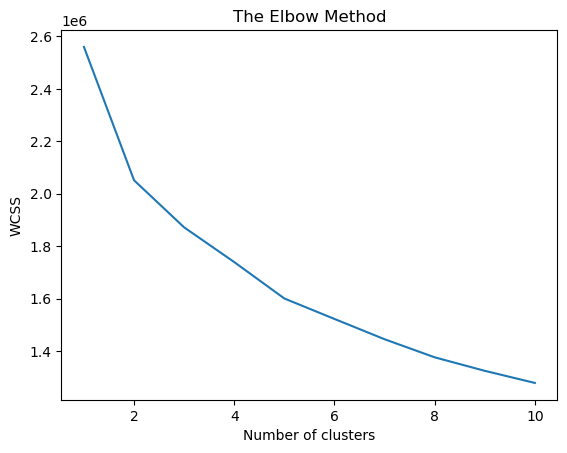

In [6]:
# Find the optimal number of clusters

# Create an empty list
wcss = []

# Create 10 clusters using a for loop
for i in range(1, 11):
    # Create a KMeans instance with k clusters: model
    kmeans = KMeans(n_clusters=i, random_state=0)
    # Fit model to samples
    kmeans.fit(dataset_scaled)
    # Append the inertia to the list of inertias
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### *Applying K-Means Clustering*

In [7]:
# Create a KMeans instance with 5 clusters: model
model = KMeans(n_clusters=5, random_state=0)

# Fit model to points
model.fit(dataset_scaled)

# Determine the cluster labels of new_points: labels
labels = model.predict(dataset_scaled)

# Print cluster labels of new_points
print(labels)


/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[3 0 3 ... 4 1 1]


#### *Labels and species as columns*

In [8]:
# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'song_title': song_titles})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['song_title'])

# Display ct
print(ct)

song_title  !Que Vida! - Mono Version  "40"  "40" - Live  \
labels                                                     
0                                   1     0            0   
1                                   0     0            0   
2                                   0     0            0   
3                                   0     0            0   
4                                   0     1            1   

song_title  "40" - Remastered 2008  "45"  "A" You're Adorable  \
labels                                                          
0                                0     0                    1   
1                                0     0                    0   
2                                0     0                    0   
3                                0     0                    0   
4                                2     1                    0   

song_title  "Addio, mio dolce amor!" from Edgar (Act III) - Voice  \
labels                                                

#### *Cluster Centers*

[[ 4.73266575e-01 -8.33957688e-01  7.83598396e-01  1.70223908e-01
  -3.48888352e-01 -4.57958883e-01 -3.02823853e-01 -1.76538397e-02
  -1.98062334e-02  6.28927259e-02 -1.53904768e-01  9.91538559e-02
  -7.68042468e-01 -1.40918169e-01  2.06175025e-02]
 [-9.76395801e-02  1.19894233e+00 -9.15806568e-01  7.83014534e-01
  -8.31128545e-03  7.53750671e-01  3.28995540e+00 -4.52017893e-01
   3.86488304e-02  4.29158761e-02  8.30587442e-01 -2.89514343e-01
   1.06743298e+00  5.65142104e-01  8.78975493e-02]
 [-4.65387837e-03 -1.36392474e+00  5.37833896e-02  7.85651296e-01
  -4.56132780e-01 -8.81531608e-01  1.46230930e+00 -5.03523584e-01
   6.96951046e-02  5.76078406e-01 -1.27831093e+00 -1.48682211e-01
  -1.28502239e+00  4.93635476e+00 -2.79364614e-01]
 [-1.11994542e+00 -5.49191252e-01  9.92575721e-01 -1.08145612e+00
   2.98981664e-01 -1.13213861e+00 -3.02101439e-01  9.74703254e-01
  -5.83554756e-02 -1.48773010e-01 -1.20873597e+00 -2.97019375e-03
  -5.64936707e-01 -3.12926764e-01 -5.32797054e-01]
 [ 2

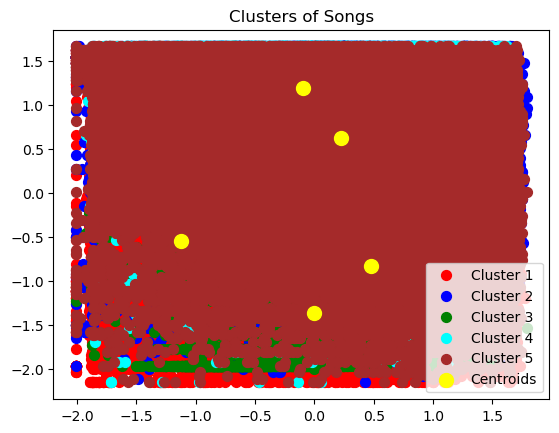

In [15]:
# Show the cluster centers
print(model.cluster_centers_)

# Plot the clusters
plt.scatter(dataset_scaled[labels == 0, 0], dataset_scaled[labels == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(dataset_scaled[labels == 1, 0], dataset_scaled[labels == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(dataset_scaled[labels == 2, 0], dataset_scaled[labels == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(dataset_scaled[labels == 3, 0], dataset_scaled[labels == 3, 1], s=50, c='cyan', label='Cluster 4')
plt.scatter(dataset_scaled[labels == 4, 0], dataset_scaled[labels == 4, 1], s=50, c='brown', label='Cluster 5')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.title('Clusters of Songs')
plt.legend()
plt.show()

## **Feature selection**

        valence  year  acousticness  danceability  duration_ms  energy  \
0        0.0594  1921       0.98200         0.279       831667   0.211   
1        0.9630  1921       0.73200         0.819       180533   0.341   
2        0.0394  1921       0.96100         0.328       500062   0.166   
3        0.1650  1921       0.96700         0.275       210000   0.309   
4        0.2530  1921       0.95700         0.418       166693   0.193   
...         ...   ...           ...           ...          ...     ...   
170648   0.6080  2020       0.08460         0.786       301714   0.808   
170649   0.7340  2020       0.20600         0.717       150654   0.753   
170650   0.6370  2020       0.10100         0.634       211280   0.858   
170651   0.1950  2020       0.00998         0.671       337147   0.623   
170652   0.6420  2020       0.13200         0.856       189507   0.721   

        explicit  instrumentalness  liveness  loudness  popularity  \
0              0          0.878000    0.6

/usr/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 4 1 ... 3 0 0]


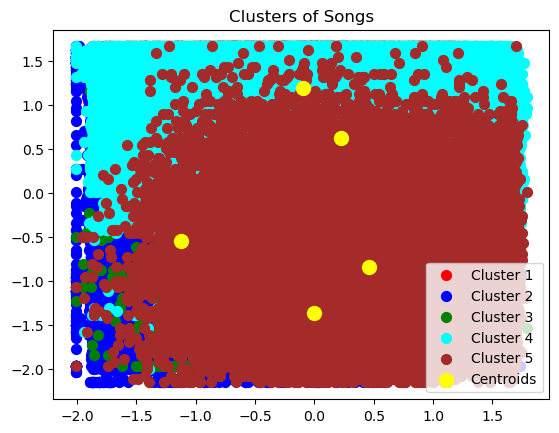

In [17]:
# Using the target generated by the previous clustering, I now calculate the best features for the clustering
selector = SelectKBest(f_classif, k=13)
res = selector.fit_transform(dataset_scaled, labels)
cols_idxs = selector.get_support(indices=True)
features_df_new = dataset.iloc[:, cols_idxs]
print(features_df_new)
print(res)

# Create a KMeans instance with 5 clusters: model
model2 = KMeans(n_clusters=5, random_state=0)

# Fit model to points
model2.fit(res)

# Determine the cluster labels of new_points: labels
labels = model2.predict(res)

# Print cluster labels of new_points
print(labels)

# Plot the clusters
plt.scatter(res[labels == 0, 0], res[labels == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(res[labels == 1, 0], res[labels == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(res[labels == 2, 0], res[labels == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(res[labels == 3, 0], res[labels == 3, 1], s=50, c='cyan', label='Cluster 4')
plt.scatter(res[labels == 4, 0], res[labels == 4, 1], s=50, c='brown', label='Cluster 5')
plt.scatter(model2.cluster_centers_[:, 0], model2.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.title('Clusters of Songs')
plt.legend()
plt.show()